In [ ]:
# libraries
import statistics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ydata_profiling as pp
import seaborn as sns

In [4]:
# reading the csv
df1 = pd.read_csv('Data/lung_cancer_one.csv')

In [3]:
# visualizing the file
df1.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


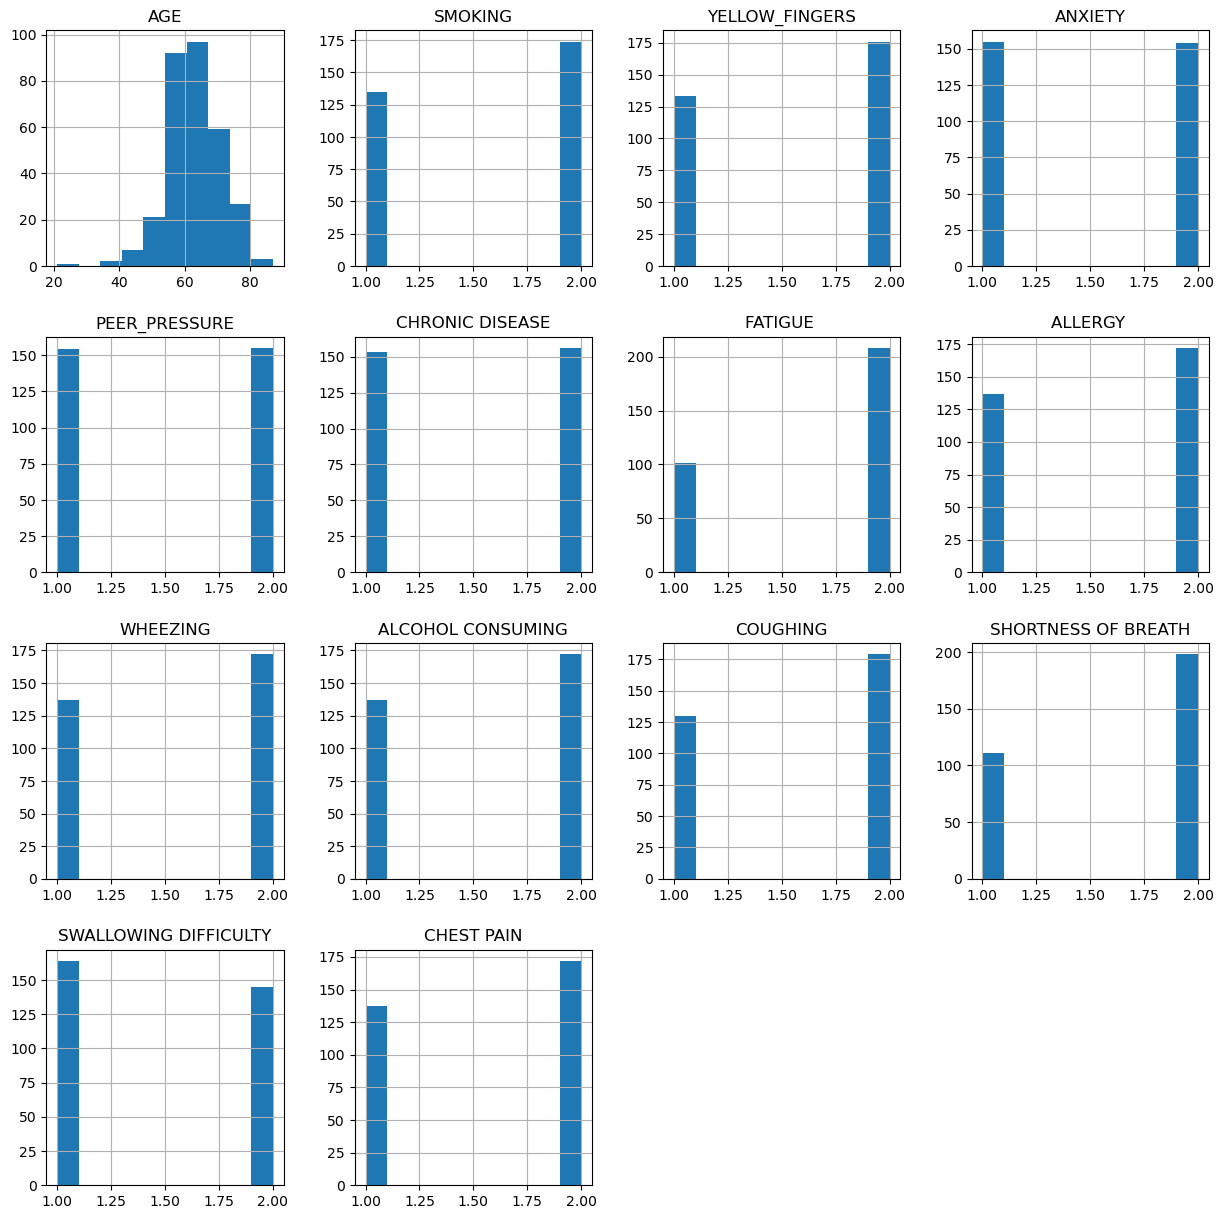

In [12]:
# histogram with data distribution
df1.hist(figsize = (15,15))
plt.savefig('Images/histograms.png', bbox_inches='tight')

 - The distribution of age is mostly between 45-80 years
 - Age is the only variable that is not a binary
 - Almost all of the variables have a balanced distribution
 - Fatigue and shortness of breath have most of their values as the number 2 (which means they have those symptoms)
 - Swallowing difficulty and is the only variable where most of the patients did not have that symptom

In [6]:
# central tendency values for the variables
age = df1['AGE']
age.head().describe().transpose()

# AGE is the only variable that is not 1 or 2
# counting the ages
age.value_counts()

64    20
63    19
56    19
62    18
60    17
61    16
59    15
70    15
67    13
58    13
69    11
55    11
72    10
71    10
68     9
57     9
77     9
51     8
54     8
65     7
74     6
75     5
76     4
52     4
53     4
73     4
47     4
66     4
49     3
81     2
78     2
44     2
48     2
21     1
79     1
38     1
39     1
87     1
46     1
Name: AGE, dtype: int64

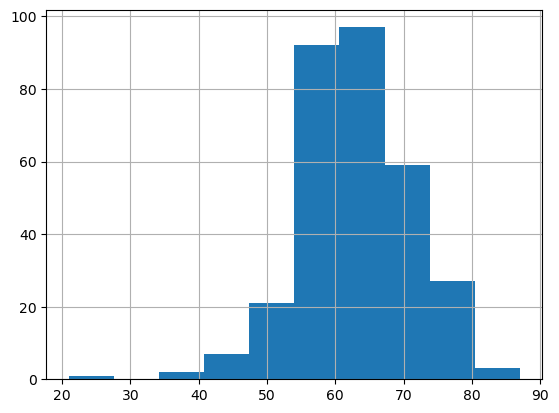

In [13]:
# histogram for age alone to better see it 
age.hist()
plt.savefig('Images/age_hist.png', bbox_inches='tight')

In [8]:
# counting how many varaibles there are in the dataframe
df1.count()

GENDER                   309
AGE                      309
SMOKING                  309
YELLOW_FINGERS           309
ANXIETY                  309
PEER_PRESSURE            309
CHRONIC DISEASE          309
FATIGUE                  309
ALLERGY                  309
WHEEZING                 309
ALCOHOL CONSUMING        309
COUGHING                 309
SHORTNESS OF BREATH      309
SWALLOWING DIFFICULTY    309
CHEST PAIN               309
LUNG_CANCER              309
dtype: int64

In [9]:
# Looking at the Lung Cancer variable, let's have a look how many have and how many don't have lung cancer
count_f = 0
count_t = 0
for x in df1['LUNG_CANCER']:
    if x == 'YES':
        count_t = count_t + 1
    else:
        count_f = count_f + 1

print(f'True counts: {count_t}')
print(f'False counts: {count_f}')

# percentages
perc_t = (count_t/ (count_t + count_f)) * 100
perc_f = (count_f/ (count_t + count_f)) * 100
print()
print(f'{perc_t:.2f}% have lung cancer and {perc_f:.2f}% dont')

True counts: 270
False counts: 39

87.38% have lung cancer and 12.62% dont


Seeing that 87% of the sample have Lung Cancer It would be hard to tell a conclusive result of what parameter can cause more lung cancer.

It would be nice to find another databank, because this set does not represent the population

In [10]:
# droping the gender column
df_coor_matrix = df1.drop(['GENDER'], axis = 1)

# substituting yes and no for 0 and 1
LUNG_CANCER = {'YES': 1, 'NO' : 0}

df_coor_matrix.LUNG_CANCER = [LUNG_CANCER[item] for item in df_coor_matrix.LUNG_CANCER]

df_coor_matrix.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


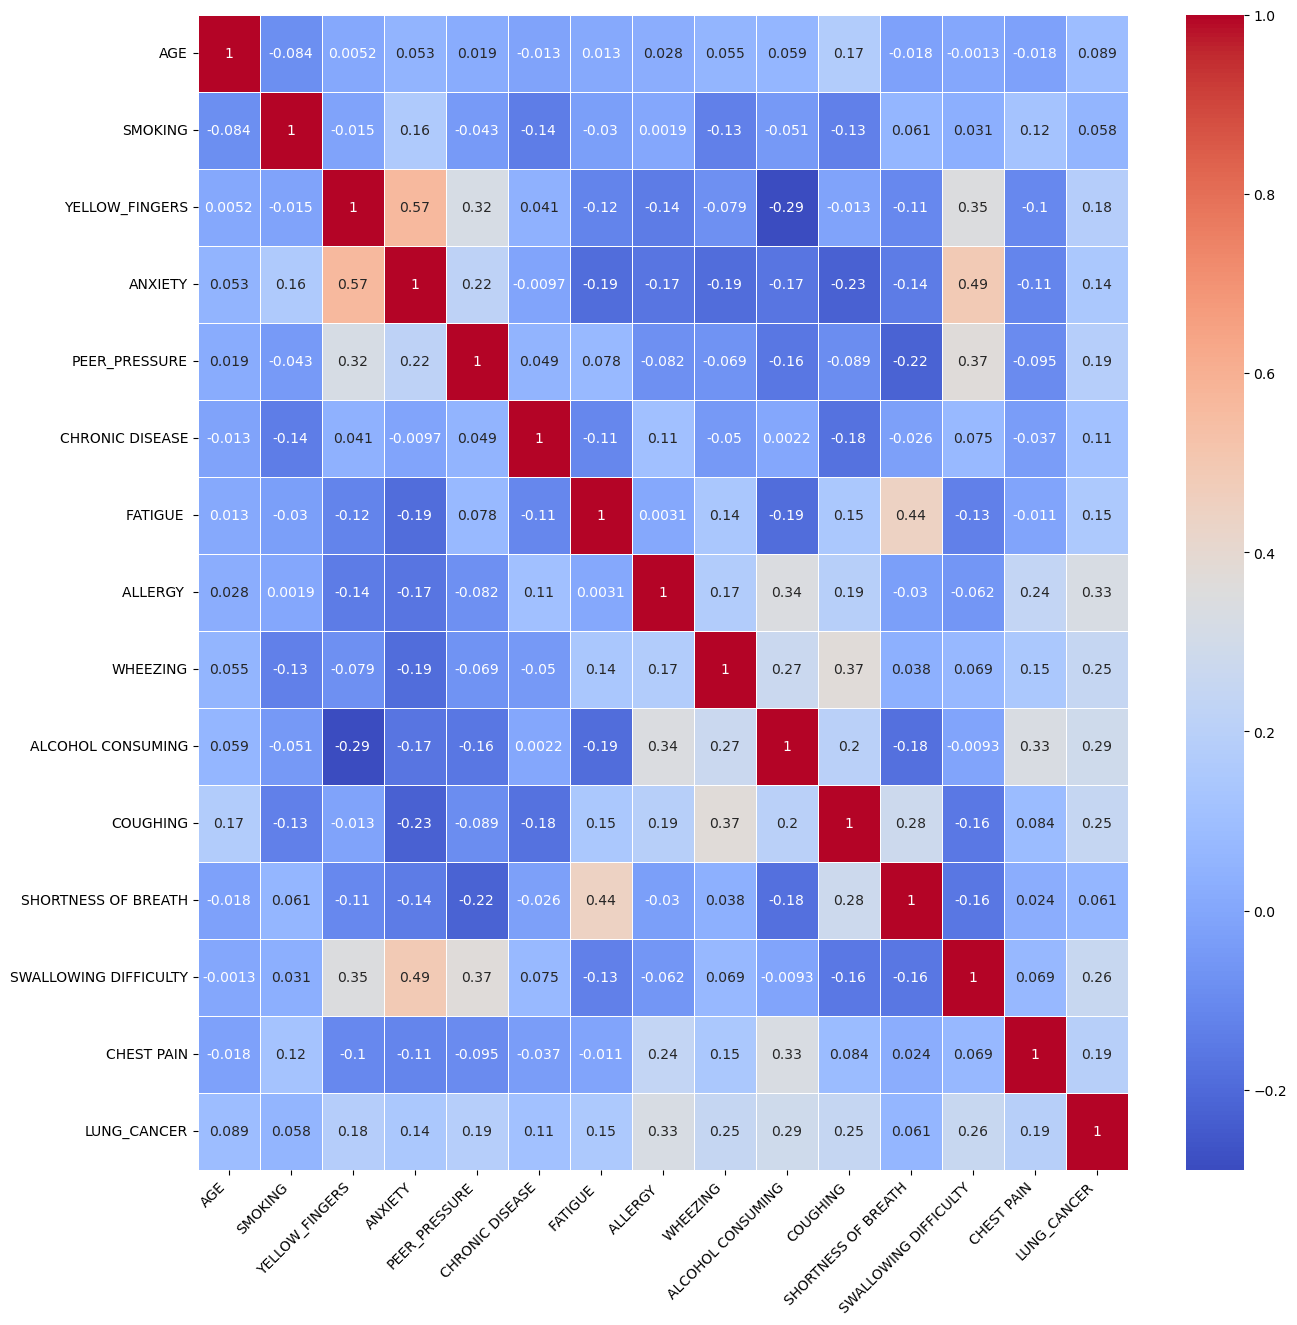

In [14]:
# creating a correlation matrix for the dataframe
plt.figure(figsize = (15,15))
corr_m = sns.heatmap(df_coor_matrix.corr(), annot = True, linewidth = .5, cmap = 'coolwarm')
corr_m.set_xticklabels(corr_m.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('Images/corr_matrix.png', bbox_inches='tight')

### For the correlation matrix, looking at the output LUNG_CANCER
 - Lung cancer has a low correlation with smoking - This is a false correlation and it is probably being influenced by a third variable and needs more investigation
 - Yellow fingers is linked with smoking, but here it is not correlated, this is another false correlation
 - Anxiety a can cause Swallowing difficulty, shortness of breath, coughing and chest pain, that is why they are all correlated within the matrix. Those symptoms can also be linked to Lung Cancer due to its complications
 - Other chronic dieses like asthma, pulmonary fibrosis and other complications can help the development of lung cancer
 - Lung cancer influence the lungs directly, that is why fatigue has a high correlation
 - Allergies can have symptoms similar to lung cancer
 - Wheezing is generated when your airways are partially blocked. This blockage can be linked to allergies, mucus, inflamation or bronchitis
 - The consumption of alcohol is linked to a diverse number of complications and, some [studies](https://cancer.ca/en/cancer-information/reduce-your-risk/limit-alcohol/some-sobering-facts-about-alcohol-and-cancer-risk#:~:text=Drinking%20alcohol%20raises%20your%20risk,your%20risk%20of%20developing%20cancer.) says that it can be linked to cancer
 - As it affects the lungs, it is strange that the correlation of lung cancer and shortness of breath is low, but, this shortness can be caused by other variables, or the patients did not have this symptom
 - Lung cancer can reduce the strength of the muscles on your neck, creating difficulties in swallowing
 - It can also cause all levels of chest pain, depending on the development of the cancer
 
### Some other correlations worth mentioning:
 - Anxiety and alcohol have a negative but high correlation. This can be due to the patients using alcohol to relieve stress/anxiety
 - Anxiety can also be linked to yellow fingers, being the highest of all correlations. As yellow fingers are created by smoking, those people are problably smoking to relieve anxiety, so the more they smoke, more yellow their fingers get, and as they are smoking to relive anxiety, the higher the anxiety, the more they smoke and more yellow the finger
 - Fatigue can also create shortness of breath
 - Smoking has a strangely low correlation with the other variables. Hard to explain, but this can have a plethora of explanations, one being they lied about smoking

In [39]:
# The risk analysis for smoking:
# non smokers
smoking1 = df_coor_matrix[df_coor_matrix['SMOKING'] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# smokers
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['SMOKING'] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2)  

# incidence risk
risk = z2/z1
print(risk)

0.8518518518518519
0.8908045977011494
1.0457271364317842


In [40]:
# The risk analysis for ANXIETY:
# no anxiety
smoking1 = df_coor_matrix[df_coor_matrix['ANXIETY'] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# anxiety
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['ANXIETY'] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.8258064516129032
0.922077922077922
1.1165787337662338


In [41]:
# The risk analysis for CHRONIC DISEASES:
# no CHRONIC DISEASE
smoking1 = df_coor_matrix[df_coor_matrix['CHRONIC DISEASE'] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# CHRONIC DISEASE
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['CHRONIC DISEASE'] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.8366013071895425
0.9102564102564102
1.0880408653846154


In [42]:
# The risk analysis for FATIGUE:
# no FATIGUE
smoking1 = df_coor_matrix[df_coor_matrix['FATIGUE '] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# FATIGUE
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['FATIGUE '] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.801980198019802
0.9086538461538461
1.1330128205128205


In [43]:
# The risk analysis for ALLERGY:
# no ALLERGY
smoking1 = df_coor_matrix[df_coor_matrix['ALLERGY '] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# ALLERGY
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['ALLERGY '] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.7518248175182481
0.9709302325581395
1.2914314743734476


In [32]:
# The risk analysis for ALCOHOL CONSUMING:
# no ALCOHOL CONSUMING
smoking1 = df_coor_matrix[df_coor_matrix['ALCOHOL CONSUMING'] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# ALCOHOL CONSUMING
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['ALCOHOL CONSUMING'] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.7664233576642335
0.9593023255813954
1.2516611295681064


In [44]:
# The risk analysis for CHEST PAIN:
# no CHEST PAIN
smoking1 = df_coor_matrix[df_coor_matrix['CHEST PAIN'] == 1]

    # counts for no cancer
count_y = 0
count_n = 0 
for x in smoking1['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z1 = count_y / (count_y + count_n)
print(z1)   

# CHEST PAIN
smoking2 = smoking1 = df_coor_matrix[df_coor_matrix['CHEST PAIN'] == 2]
    # counts for cancer
count_y = 0
count_n = 0 
for x in smoking2['LUNG_CANCER']:
    if x == 1:
        count_y += 1
    else:
        count_n += 1

    # Absolute risk
z2 = count_y / (count_y + count_n)
print(z2) 

# incidence risk
risk = z2/z1
print(risk)

0.8029197080291971
0.9302325581395349
1.1585623678646935


### THE DATA IS NOT RELIABLE